In [1]:
from data.dataset import load_dataset
from helpers.data_research import data_research
from helpers.correlataion import find_correlated_columns
from data.create_dataset import create_dataset

from models.RNN_Model import create_RNN_model

In [2]:
dataset = load_dataset()
print(dataset)

                      mdct        date    yr  mo  da  hr  prcp     stp  \
0      2006-10-31 00:00:00  2006-10-31  2006  10  31   0   0.0     0.0   
1      2006-10-31 01:00:00  2006-10-31  2006  10  31   1   0.0     0.0   
2      2006-10-31 02:00:00  2006-10-31  2006  10  31   2   0.0     0.0   
3      2006-10-31 03:00:00  2006-10-31  2006  10  31   3   0.0     0.0   
4      2006-10-31 04:00:00  2006-10-31  2006  10  31   4   0.0     0.0   
...                    ...         ...   ...  ..  ..  ..   ...     ...   
86947  2016-09-30 19:00:00  2016-09-30  2016   9  30  19   0.0  1015.3   
86948  2016-09-30 20:00:00  2016-09-30  2016   9  30  20   0.0  1015.7   
86949  2016-09-30 21:00:00  2016-09-30  2016   9  30  21   0.0  1016.0   
86950  2016-09-30 22:00:00  2016-09-30  2016   9  30  22   0.0  1016.5   
86951  2016-09-30 23:00:00  2016-09-30  2016   9  30  23   0.0  1017.8   

          gbrd  temp  dewp  hmdy  wdsp   wdct  gust  
0        0.000   0.0   0.0   0.0   0.0    0.0   0.0  
1  

YEAR: 2016
MEAN: 24.725897201946474
MINIMAL: 14.2
MAXIMUM: 35.6
STANDARD DEVIATION: 3.828126440782392


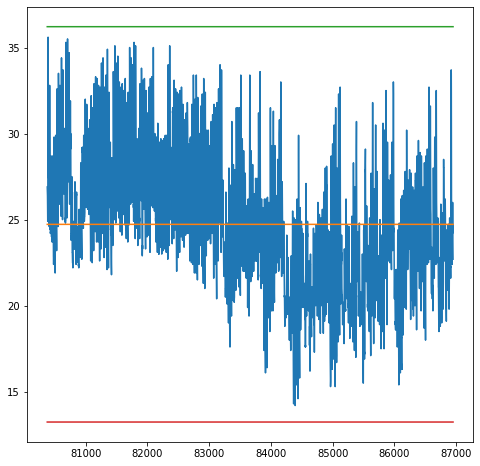

YEAR: 2006
MEAN: 24.839516129032255
MINIMAL: 17.2
MAXIMUM: 34.7
STANDARD DEVIATION: 2.9509765690766407


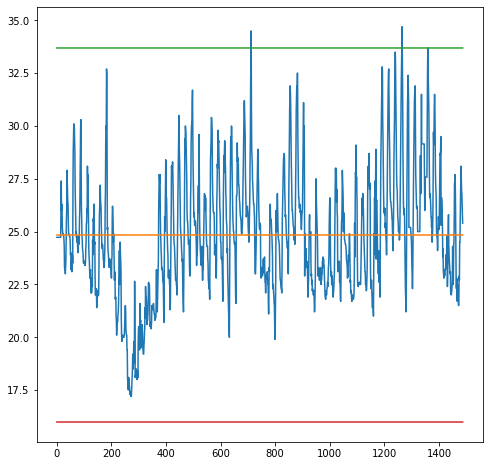

YEAR: 2007
MEAN: 24.203616438356168
MINIMAL: 14.2
MAXIMUM: 35.4
STANDARD DEVIATION: 3.599372159724289


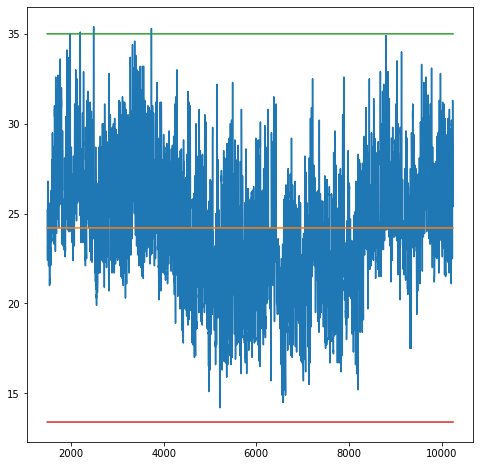

YEAR: 2008
MEAN: 23.984933970856098
MINIMAL: 14.5
MAXIMUM: 35.3
STANDARD DEVIATION: 3.5762010474318147


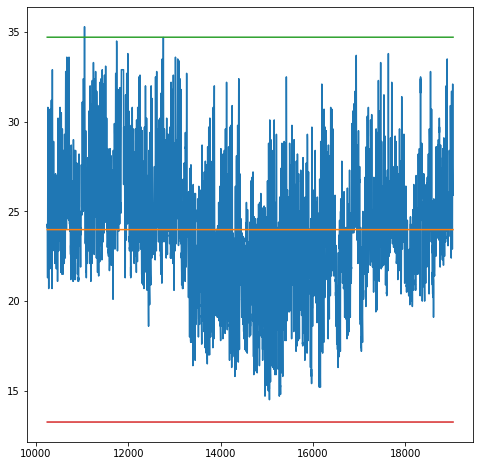

YEAR: 2009
MEAN: 24.62398515981735
MINIMAL: 14.8
MAXIMUM: 37.0
STANDARD DEVIATION: 3.5614109875412527


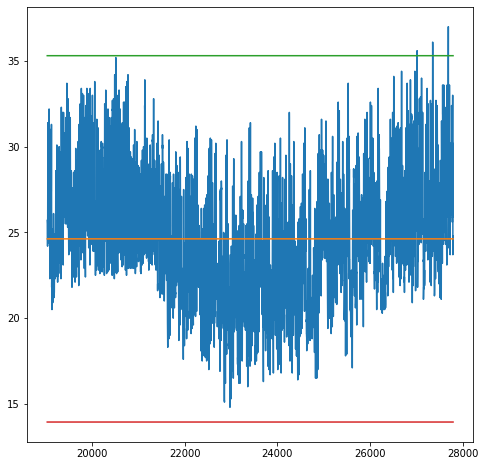

YEAR: 2010
MEAN: 24.268635844748857
MINIMAL: 13.4
MAXIMUM: 37.2
STANDARD DEVIATION: 4.026700263607955


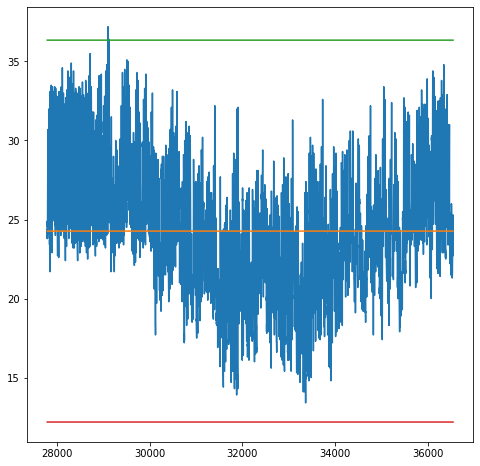

YEAR: 2011
MEAN: 23.64087214611872
MINIMAL: 12.0
MAXIMUM: 34.4
STANDARD DEVIATION: 3.605514388199942


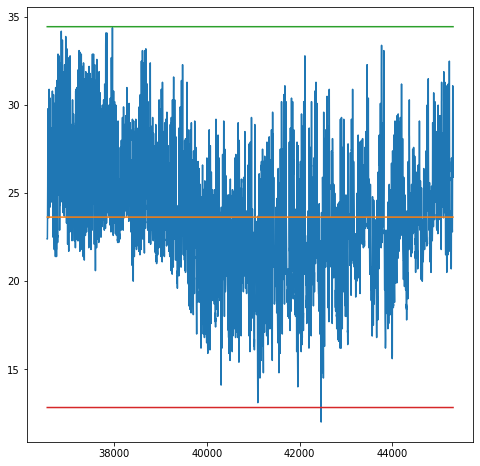

YEAR: 2012
MEAN: 24.09573428961749
MINIMAL: 14.6
MAXIMUM: 37.1
STANDARD DEVIATION: 3.598851782551768


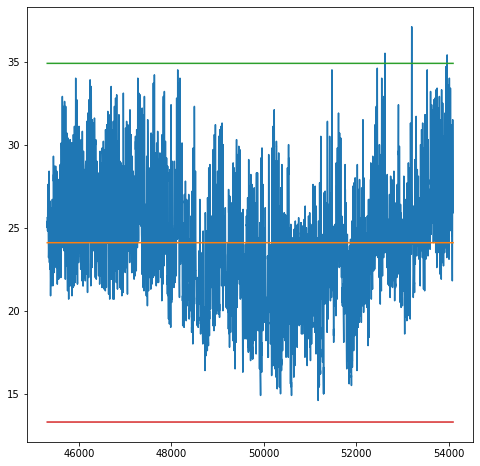

YEAR: 2013
MEAN: 23.967339041095894
MINIMAL: 13.6
MAXIMUM: 36.0
STANDARD DEVIATION: 3.6074837676434117


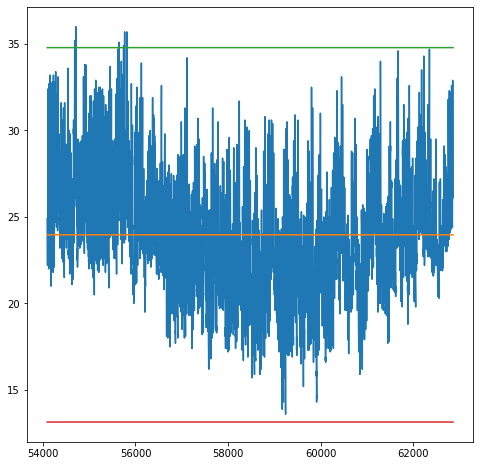

YEAR: 2014
MEAN: 24.204835616438356
MINIMAL: 13.4
MAXIMUM: 35.6
STANDARD DEVIATION: 3.824316406507837


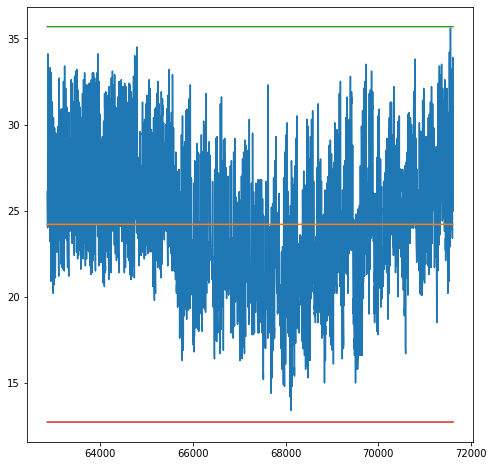

YEAR: 2015
MEAN: 24.94039726027397
MINIMAL: 14.7
MAXIMUM: 37.0
STANDARD DEVIATION: 3.7511487210793804


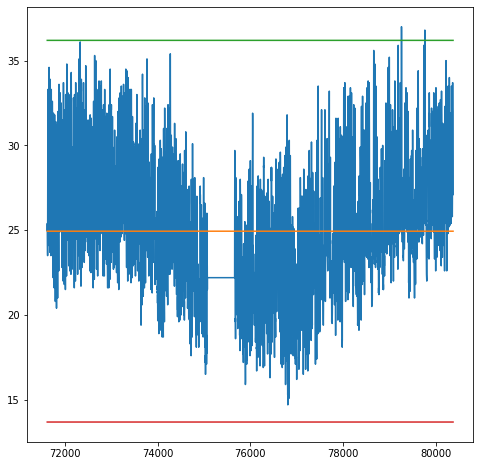

In [3]:
data_research(dataset, 'temp')

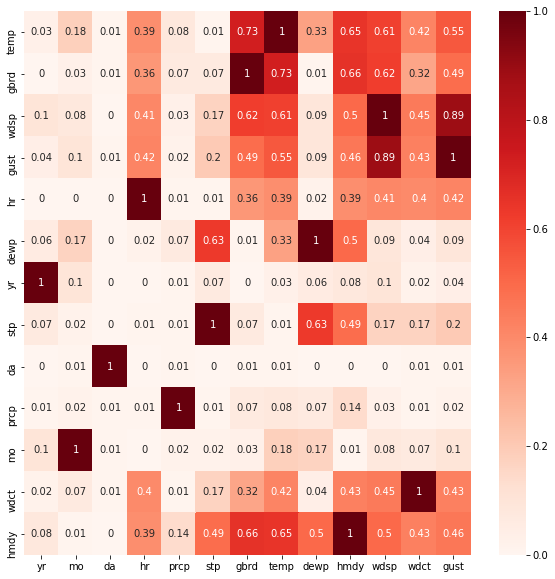

temp    1.000000
gbrd    0.730978
wdsp    0.606191
gust    0.551623
hr      0.394340
dewp    0.326034
mo      0.175883
wdct    0.417208
hmdy    0.645084
Name: temp, dtype: float64


In [4]:
features_temp = features_hmdy = find_correlated_columns(dataset, 'temp')

In [5]:
#X_temp = create_dataset(dataset, features_temp)
X_temp = dataset.loc[:, ~dataset.columns.isin(['temp', 'mdct', 'date'])]
print(X_temp.shape)

(86952, 8)


In [6]:
y_temp = create_dataset(dataset, ['temp'])
print(y_temp.shape)

(86952, 1)


Epoch 1/300
128/128 [==============================] - 13s 105ms/step - loss: 31.8467 - mean_squared_error: 31.8467
Epoch 2/300
128/128 [==============================] - 14s 110ms/step - loss: 6.6015 - mean_squared_error: 6.6015
Epoch 3/300
128/128 [==============================] - 15s 116ms/step - loss: 6.1254 - mean_squared_error: 6.1254
Epoch 4/300
128/128 [==============================] - 15s 120ms/step - loss: 6.0185 - mean_squared_error: 6.0185
Epoch 5/300
128/128 [==============================] - 15s 118ms/step - loss: 5.6668 - mean_squared_error: 5.6668
Epoch 6/300
128/128 [==============================] - 15s 114ms/step - loss: 5.4781 - mean_squared_error: 5.4781
Epoch 7/300
128/128 [==============================] - 13s 104ms/step - loss: 4.2614 - mean_squared_error: 4.2614
Epoch 8/300
128/128 [==============================] - 13s 104ms/step - loss: 2.9041 - mean_squared_error: 2.9041
Epoch 9/300
128/128 [==============================] - 13s 103ms/step - loss: 1.9481 -

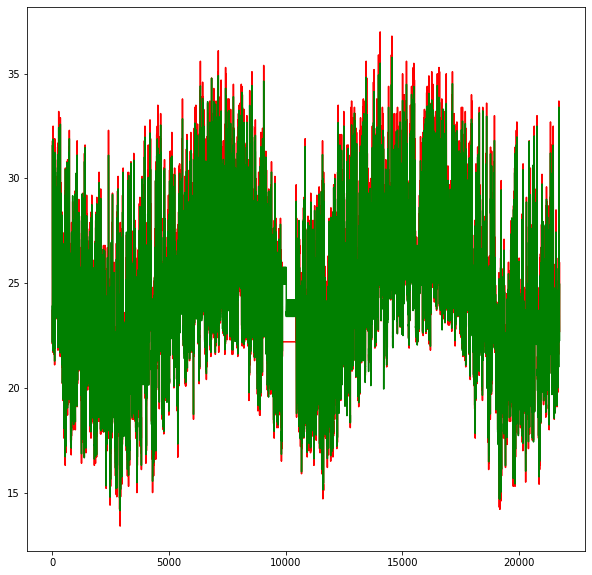

In [7]:
model = create_RNN_model(X_temp, y_temp)

In [8]:
#model.save("finalized_RNN_model.h5")